## M1 PS3
#### 1) (a)
Creating an XOR function with one hidden layer using sigmoid activation functions.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist #to import our dataset
from tensorflow.keras.models import Sequential, Model # imports our type of network
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization # imports our layers we want to use

from tensorflow.python.keras.losses import categorical_crossentropy #loss function
from tensorflow.keras.optimizers import Adam, SGD #optimisers
from tensorflow.keras.utils import to_categorical #some function for data preparation

from tensorflow.keras.callbacks import ModelCheckpoint #checkpoints used to keep track of best model

from tensorflow.keras.mixed_precision import set_global_policy

set_global_policy('float32') 

#### (i) Model with on hidden layer and 10 neurons with random uniform initialisation

In [3]:
#setting training variables
batch_size = 4 #number of inidividual examples trained on before stopping and adjusting weights
num_classes = 1
epochs = 1000 #number of cycles over the same training dataset

#outlining training datasets
x_train = np.array([[0,0],[1,0],[0,1],[1,1]])
y_train = np.array([[0],[1],[1],[0]])
x_test = np.array([[0,0],[1,0],[0,1],[1,1]])
y_test = np.array([[0],[1],[1],[0]])


#tests
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

#creating neural network
input_network = Input(shape=(2,))
x = Dense(10, activation='sigmoid', kernel_initializer='random_uniform')(input_network)
y = Dense(1,activation='sigmoid', kernel_initializer='random_uniform')(x)

model = Model(input_network,outputs=y)
opt = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()


x_train shape: (4, 2)
y_train shape: (4, 1)


2025-11-18 16:23:26.164517: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-11-18 16:23:26.164768: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-18 16:23:26.164782: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-18 16:23:26.165417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-18 16:23:26.165437: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
hidden_weights = model.layers[1].get_weights()
print("Hidden Layer Weights (Input -> Hidden):\n", hidden_weights[0])
print("Hidden Layer Biases:\n", hidden_weights[1])

history1 = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))

Hidden Layer Weights (Input -> Hidden):
 [[ 0.0085469   0.02825794  0.00954334  0.00445657  0.03240111  0.01635676
   0.03555172  0.03184963 -0.04467474 -0.03936554]
 [ 0.04845704  0.01834004 -0.01904483 -0.01913133 -0.00653894  0.00998654
  -0.01762199  0.0329829  -0.04369155  0.0461964 ]]
Hidden Layer Biases:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 6/1000
1/1 ━

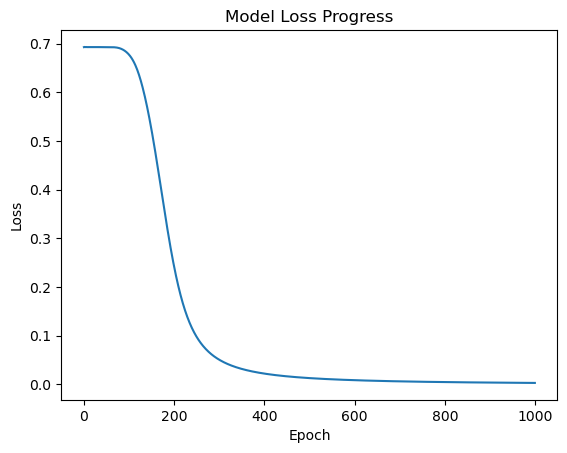

Hidden Layer Weights (Input -> Hidden):
 [[-3.187878  -3.035294  -5.3329887 -4.9198685 -2.9268522 -2.9336257
   3.0994074 -2.9994729 -4.9400077 -4.3221354]
 [-4.139126  -4.014856  -5.078085  -4.593248  -3.9205177 -3.9279866
   4.0737023 -3.9860563 -4.59903    4.5113916]]
Hidden Layer Biases:
 [ 5.5196137  5.3062844  2.4629495  2.2461245  5.155102   5.165432
 -5.3989167  5.257025   2.2473261 -3.1019173]


In [ ]:
# Plot the loss value stored in the history object
plt.plot(history1.history['loss'])
plt.title('Model Loss Progress')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


hidden_weights = model.layers[1].get_weights()
print("Hidden Layer Weights (Input -> Hidden):\n", hidden_weights[0])
print("Hidden Layer Biases:\n", hidden_weights[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Inputs:
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
Predictions:
[[0.00179234]
 [0.9991429 ]
 [0.9957838 ]
 [0.00318374]]


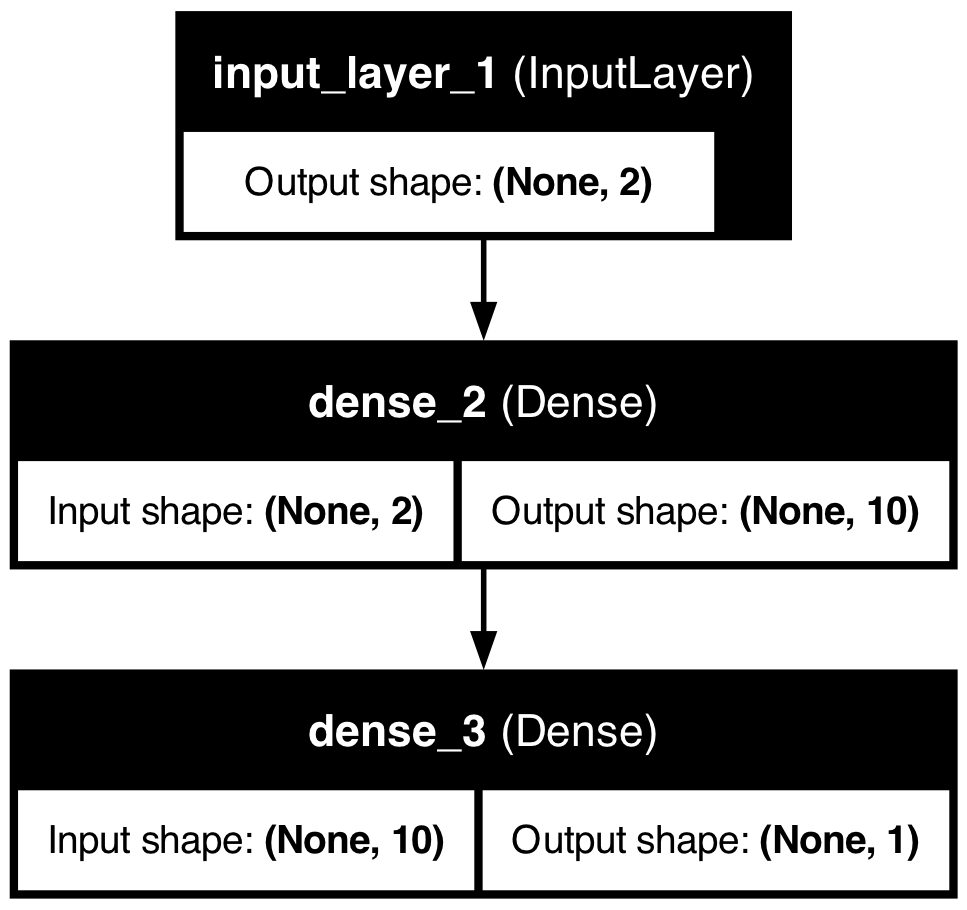

In [12]:
predictions = model.predict(x_test)
print('Inputs:')
print(x_test)
print('Predictions:')
print(predictions)

from keras.utils import plot_model
from IPython.display import Image

# Creates a file 'model_structure.png'
plot_model(model, to_file='model_structure.png', 
           show_shapes=True, 
           show_layer_names=True,
           show_dtype=False)

#### (ii) Model with on hidden layer and 10 neurons with zero initialisation

In [20]:
#setting training variables
batch_size = 4 #number of inidividual examples trained on before stopping and adjusting weights
num_classes = 1
epochs = 1000 #number of cycles over the same training dataset

#outlining training datasets
x_train = np.array([[0,0],[1,0],[0,1],[1,1]])
y_train = np.array([[0],[1],[1],[0]])
x_test = np.array([[0,0],[1,0],[0,1],[1,1]])
y_test = np.array([[0],[1],[1],[0]])


#tests
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

#creating neural network
input_network = Input(shape=(2,))
x = Dense(10, activation='sigmoid', kernel_initializer='zeros')(input_network)
y = Dense(1,activation='sigmoid', kernel_initializer='zeros')(x)

model = Model(input_network,outputs=y)
opt = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()


x_train shape: (4, 2)
y_train shape: (4, 1)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
hidden_weights = model.layers[1].get_weights()
print("Hidden Layer Weights (Input -> Hidden):\n", hidden_weights[0])
print("Hidden Layer Biases:\n", hidden_weights[1])

history1 = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))

Hidden Layer Weights (Input -> Hidden):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Biases:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - los

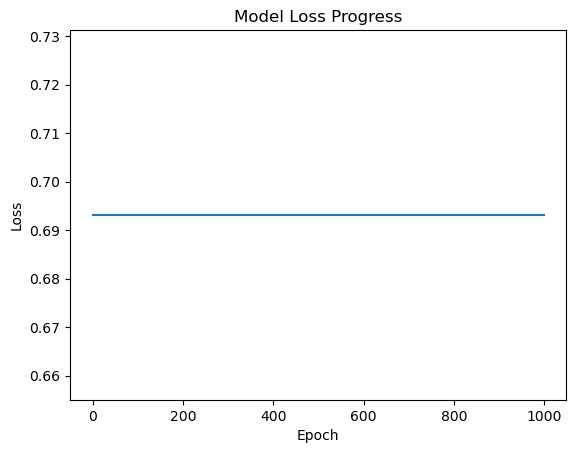

Hidden Layer Weights (Input -> Hidden):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Biases:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Inputs:
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
Predictions:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


In [23]:
# Plot the loss value stored in the history object
plt.plot(history1.history['loss'])
plt.title('Model Loss Progress')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


hidden_weights = model.layers[1].get_weights()
print("Hidden Layer Weights (Input -> Hidden):\n", hidden_weights[0])
print("Hidden Layer Biases:\n", hidden_weights[1])

predictions = model.predict(x_test)
print('Inputs:')
print(x_test)
print('Predictions:')
print(predictions)

#### (iv) Model with one hidden layer and 2 neurons

In [13]:
#setting training variables
batch_size = 4 #number of inidividual examples trained on before stopping and adjusting weights
num_classes = 1
epochs = 1000 #number of cycles over the same training dataset

#outlining training datasets
x_train = np.array([[0,0],[1,0],[0,1],[1,1]])
y_train = np.array([[0],[1],[1],[0]])
x_test = np.array([[0,0],[1,0],[0,1],[1,1]])
y_test = np.array([[0],[1],[1],[0]])


#tests
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

#creating neural network
input_network = Input(shape=(2,))
x = Dense(2, activation='sigmoid')(input_network)
y = Dense(1,activation='sigmoid')(x)

model = Model(input_network,outputs=y)
opt = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()


x_train shape: (4, 2)
y_train shape: (4, 1)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
hidden_weights = model.layers[1].get_weights()
print("Hidden Layer Weights (Input -> Hidden):\n", hidden_weights[0])
print("Hidden Layer Biases:\n", hidden_weights[1])

history2 = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))

Hidden Layer Weights (Input -> Hidden):
 [[-1.1338745  -0.00560999]
 [-0.6565988   0.7568679 ]]
Hidden Layer Biases:
 [0. 0.]
Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - accuracy: 0.7500 - loss: 0.6909 - val_accuracy: 0.7500 - val_loss: 0.6901
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.6901 - val_accuracy: 0.7500 - val_loss: 0.6894
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7500 - loss: 0.6894 - val_accuracy: 0.7500 - val_loss: 0.6888
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7500 - loss: 0.6888 - val_accuracy: 0.7500 - val_loss: 0.6883
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7500 - loss: 0.6883 - val_accuracy: 0.7500 - val_loss: 0.6879
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7500 - loss: 0.6879 - val_accuracy: 0.7500 - val_loss: 0.6875
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7500 - loss: 0.6875 - val_accuracy: 0.7500 - v

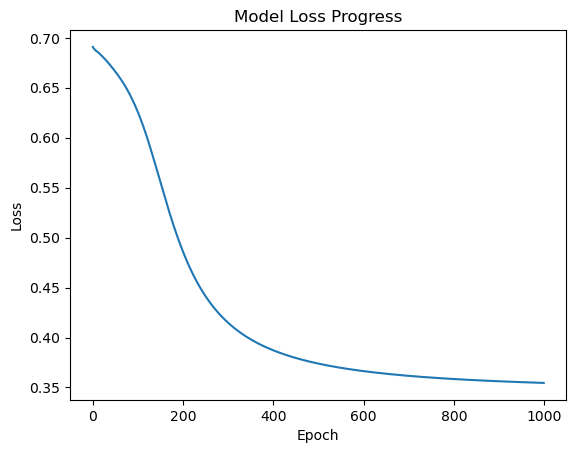

Hidden Layer Weights (Input -> Hidden):
 [[-7.2556176 -7.300113 ]
 [-4.285845   4.776686 ]]
Hidden Layer Biases:
 [ 1.1965275 -3.5208623]


In [15]:
# Plot the loss value stored in the history object
plt.plot(history2.history['loss'])
plt.title('Model Loss Progress')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


hidden_weights = model.layers[1].get_weights()
print("Hidden Layer Weights (Input -> Hidden):\n", hidden_weights[0])
print("Hidden Layer Biases:\n", hidden_weights[1])

In [16]:
predictions = model.predict(x_test)
print('Inputs:')
print(x_test)
print('Predictions:')
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Inputs:
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
Predictions:
[[0.00852793]
 [0.49600568]
 [0.9919242 ]
 [0.5035417 ]]


### 2) Neural Network for regression

#### (i) writing function

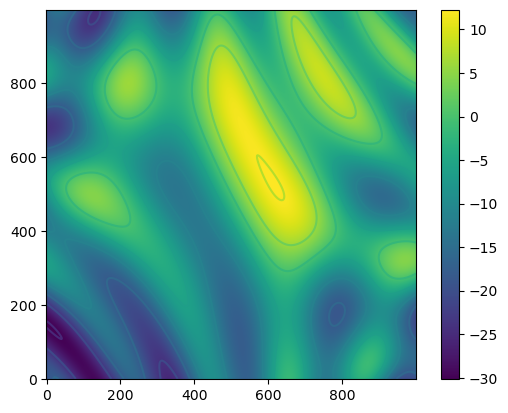

In [116]:
from sklearn.model_selection import train_test_split

def function_gen(x1, x2):
    return -(x1*(x1-1) + x2*(x2-1)) + 12*np.cos(x1*x2)*np.sin(2*x1 + x2)

def sample_gen(n_samples):
    x1 = np.random.uniform(-3,3,n_samples)
    x2 = np.random.uniform(-3,3,n_samples)
    x = np.column_stack((x1, x2))

    y = function_gen(x1, x2)
    return x, y

#creating training data
n_samples = 10000
x, y = sample_gen(n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y)


x = np.linspace(-3,3,1000)
y = np.linspace(-3,3,1000)
X, Y = np.meshgrid(x,y)
f_arr = function_gen(X,Y) 

#plotting the function
im = plt.imshow(f_arr, origin='lower')
plt.contour(f_arr, origin='lower')
plt.colorbar(im)

#### (ii) creating a NN with two dense layers

In [117]:
batch_size = 64
epochs = 50

input_network = Input(shape=(2,),)
x = Dense(128,activation='tanh')(input_network)
x = Dense(128,activation='tanh')(x)
x = Dense(128,activation='tanh')(x)
y = Dense(1)(x)  # No activation for regression - allows any real-valued output

model = Model(input_network,outputs=y)
model.compile(loss='mse',optimizer='adam', metrics=['mse'])
model.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,537 (131.00 KB)

 Trainable params: 33,537 (131.00 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
history1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 62.9904 - mse: 62.9904 - val_loss: 51.4918 - val_mse: 51.4918
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 43.4659 - mse: 43.4659 - val_loss: 36.2951 - val_mse: 36.2951
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 33.0323 - mse: 33.0323 - val_loss: 32.4739 - val_mse: 32.4739
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 28.1083 - mse: 28.1083 - val_loss: 25.3395 - val_mse: 25.3395
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 24.1138 - mse: 24.1138 - val_loss: 22.2085 - val_mse: 22.2085
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 21.2144 - mse: 21.2144 - val_loss: 19.3801 - val_mse: 19.3801
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 18.9245 - mse: 18.9245 - val_loss: 17.8421 - val_mse: 17.8421
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 17.1738 - mse: 17.1738 - val_loss: 16.2708 - val_mse: 16.2708
Epoch 9/50
118/1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


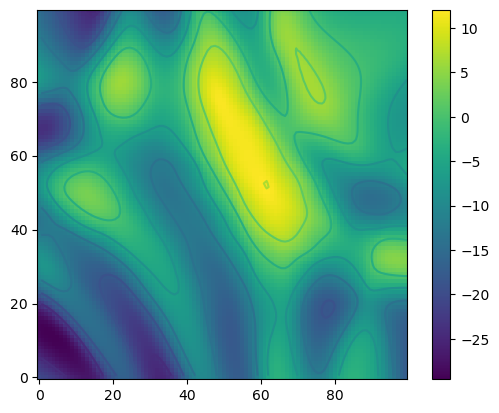

In [119]:
size = 100
x = np.linspace(-3,3,size)
y = np.linspace(-3,3,size)
X, Y = np.meshgrid(x,y)
f_arr = function_gen(X,Y)
#features: x, y
x_data = np.column_stack((X.reshape(size**2),Y.reshape(size**2)))
y_data = f_arr.reshape(size**2)


predictions = model.predict(x_data)
#plotting the function
predictions = predictions.reshape((size,size))
im = plt.imshow(predictions, origin='lower')
plt.contour(predictions, origin='lower')
plt.colorbar(im)


### (iii) augmenting data - additional input features

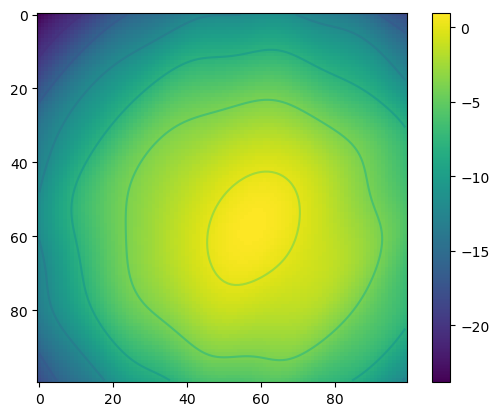

In [ ]:
from sklearn.model_selection import train_test_split

def f(x, y):
    return -(x*(x-1) + y*(y-1)) + 0.5*np.cos(x*y)*np.sin(2*x + y)

n_samples = 100
x = np.linspace(-3,3,n_samples)
y = np.linspace(-3,3,n_samples)
X, Y = np.meshgrid(x,y)
f_arr = f(X,Y)

#plotting the function
im = plt.imshow(f_arr)
plt.contour(f_arr)
plt.colorbar(im)

#features: x, y, x^2, xy, y^2
x_data = np.column_stack((X.reshape(n_samples**2),Y.reshape(n_samples**2),X.reshape(n_samples**2)**2,X.reshape(n_samples**2)*Y.reshape(n_samples**2),Y.reshape(n_samples**2)**2))
y_data = f_arr.reshape(n_samples**2)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)


In [ ]:
batch_size = 64
epochs = 10

input_network = Input(shape=(2,))
x = Dense(10,activation='sigmoid')(input_network)
x = Dense(10,activation='sigmoid')(x)
y = Dense(1)(x)  # No activation for regression - allows any real-valued output

model = Model(input_network,outputs=y)
opt = Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=opt, metrics=['accuracy'])
model.summary()